In [1]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [92]:
def hist_equ(image):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''
    
    ############
    # Your code
    # Start
    w ,h = image.shape # width and height
    image_size = w*h # image size
    histogram = np.zeros(256) # histogram initializing
    cdf=[]
    normalized =[]
    L = 256
    
    for r in range(w):        
        for c in range(h): 
            histogram[image[r][c]] += 1 
    
    cdf.append(histogram[0])
    index = 0
    for i in range(L):
        cdf.append(cdf[index] + histogram[i])
        index += 1
        
    l = len(cdf)
    for i in range(l):
        normalized.append(cdf[i]*(L-1)/image_size)

    for r in range(w):
      for c in range(h):
        image[r][c]= normalized[image[r][c]]

    return image

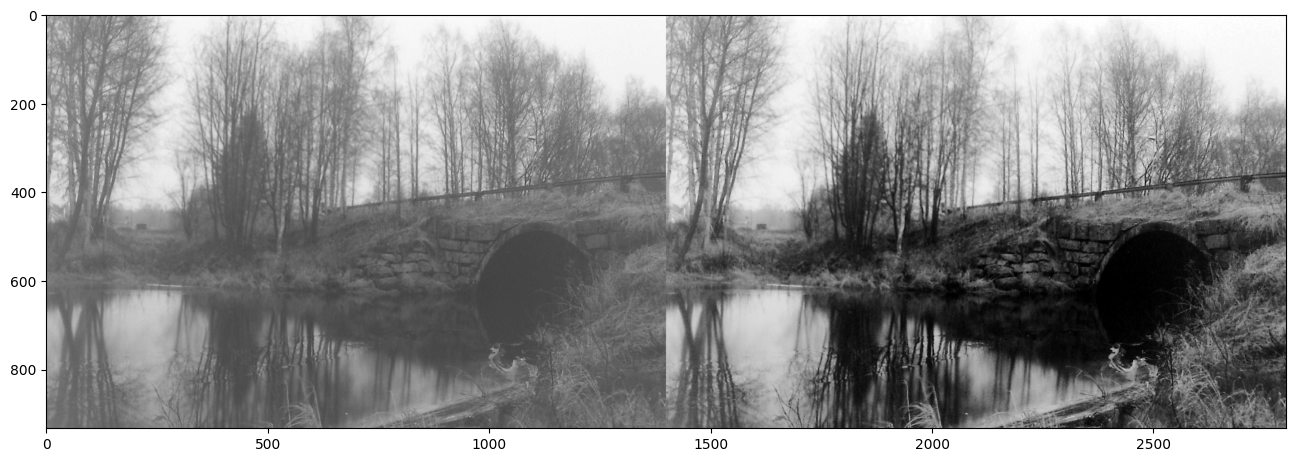

In [90]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = hist_equ(img)
# END

res = np.hstack((cv2.imread('River.jpg', 0), equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

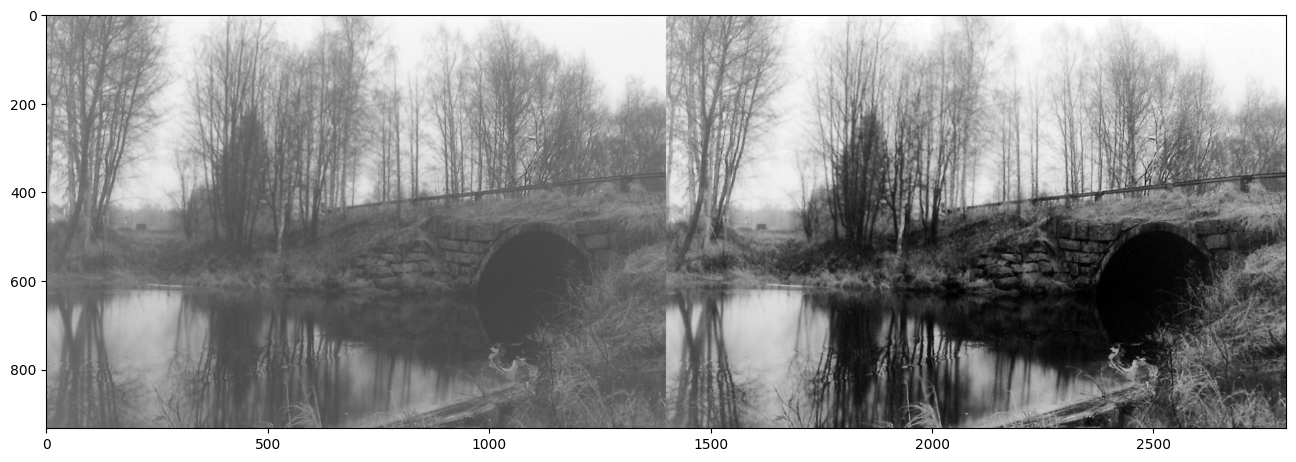

In [35]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 2

### CLAHE OpenCV Library

In [36]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    clahe = cv2.createCLAHE(clipLimit = clip_limit, tileGridSize=gridSize)
    output_image = clahe.apply(image)
 
    # End

    return output_image

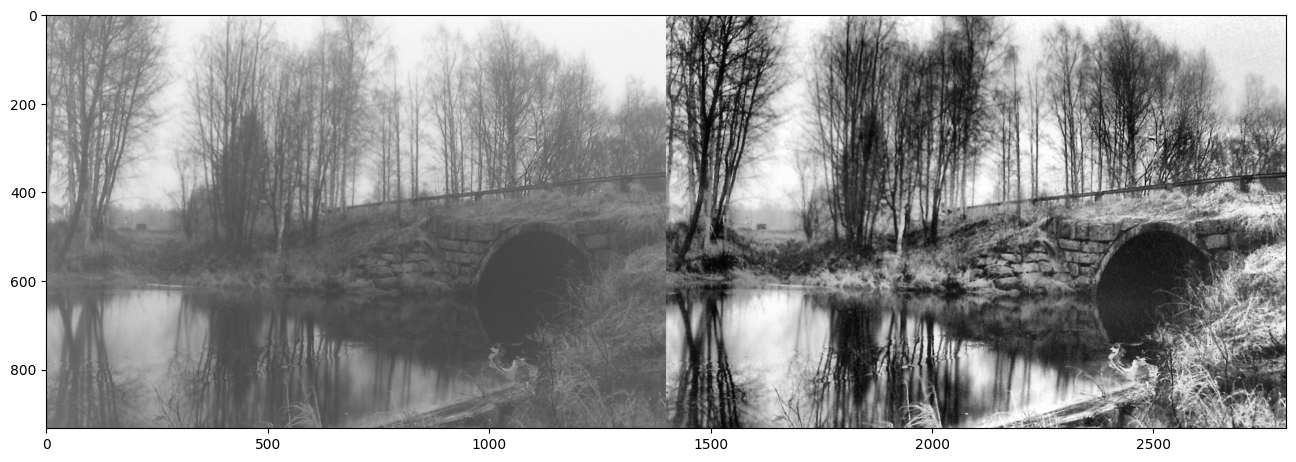

In [53]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
clh = CLAHE(img, (5,5), 5)
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

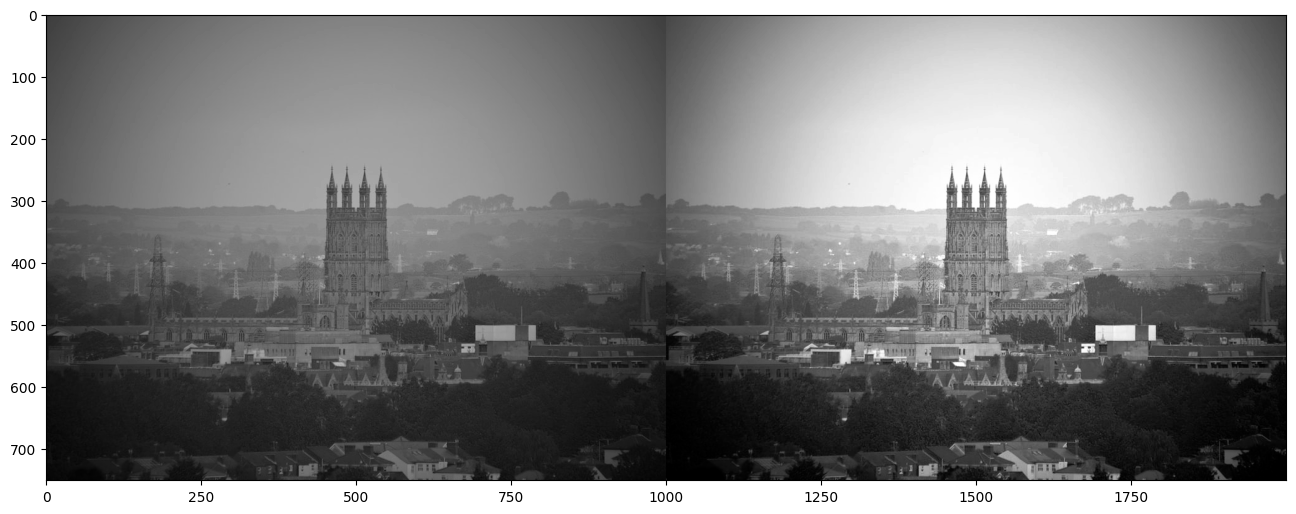

In [69]:
equ1 = hist_equ(cv2.imread('City.jpg', 0))

res = np.hstack((cv2.imread('City.jpg', 0),equ1)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

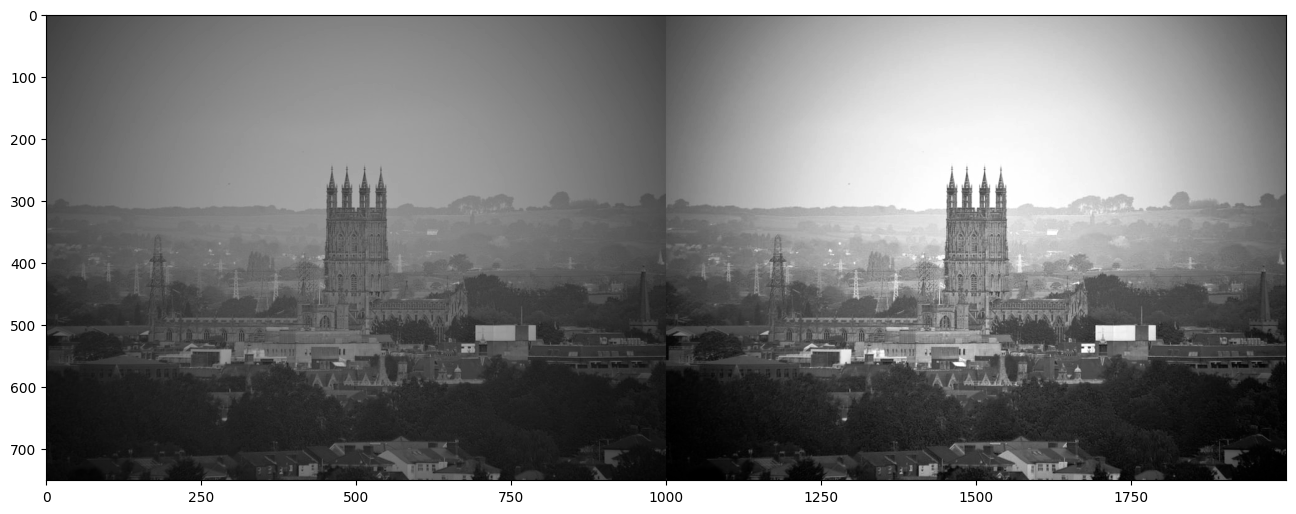

In [58]:
equ2 = cv2.equalizeHist(cv2.imread('City.jpg', 0))

res = np.hstack((cv2.imread('City.jpg', 0),equ2)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

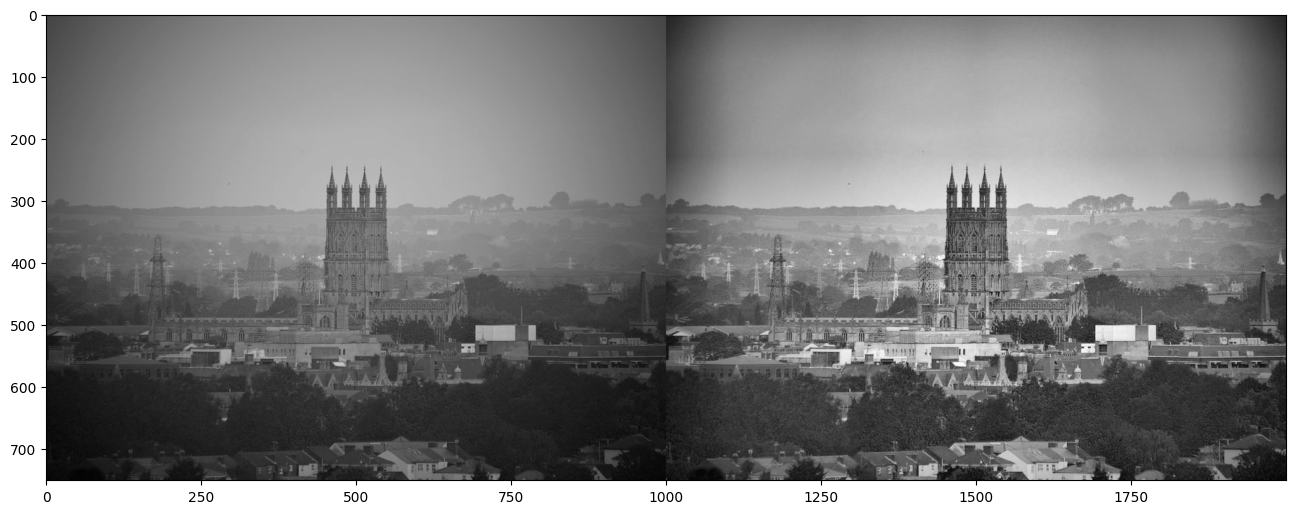

In [62]:
clh = CLAHE(cv2.imread('City.jpg', 0),(5,5), 2)

res = np.hstack((cv2.imread('City.jpg', 0),clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')